# WeatherPy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from datetime import datetime
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

units="imperial"

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
data = []
towns = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_Speed = []
country = []      
date = []
counter = 0
site = "https://api.openweathermap.org/data/2.5/weather?"
print("Beginning Data Retrieval     ")
print("-----------------------------")
for city in cities:
    url = f"{site}q={city}&appid={weather_api_key}&units={units}"
    response = requests.get(url).json()
    try:
        counter += 1
        
        lat.append(response['coord']["lat"])
        lng.append(response["coord"]["lon"])
        town = response["name"]
        towns.append(town)
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_Speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        data.append(response)
        print(f"Processing Record {counter} of Set 1 | {city}____{town}")
    except (KeyError, IndexError):
        print("City not found. Skipping...")
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")
# Need to be formated

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura____Mataura
City not found. Skipping...
Processing Record 3 of Set 1 | jamestown____Jamestown
Processing Record 4 of Set 1 | avarua____Avarua
Processing Record 5 of Set 1 | tuktoyaktuk____Tuktoyaktuk
Processing Record 6 of Set 1 | bengkulu____Bengkulu
Processing Record 7 of Set 1 | avera____Avera
Processing Record 8 of Set 1 | oyama____Oyama
Processing Record 9 of Set 1 | port alfred____Port Alfred
Processing Record 10 of Set 1 | hobart____Hobart
Processing Record 11 of Set 1 | ushuaia____Ushuaia
Processing Record 12 of Set 1 | barrow____Barrow
Processing Record 13 of Set 1 | saint-georges____St. George's
Processing Record 14 of Set 1 | skjervoy____Skjervøy
Processing Record 15 of Set 1 | baymak____Baymak
Processing Record 16 of Set 1 | shingu____Shingū
Processing Record 17 of Set 1 | lebu____Lebu
Processing Record 18 of Set 1 | hermanus____Hermanus
Processing Record 19 of Set 1 | ambilobe

Processing Record 159 of Set 1 | nanortalik____Nanortalik
City not found. Skipping...
Processing Record 161 of Set 1 | ossora____Ossora
Processing Record 162 of Set 1 | lebork____Lębork
Processing Record 163 of Set 1 | kaitangata____Kaitangata
Processing Record 164 of Set 1 | pasni____Pasni
Processing Record 165 of Set 1 | kamaishi____Kamaishi
Processing Record 166 of Set 1 | asosa____Āsosa
Processing Record 167 of Set 1 | cockburn town____Cockburn Town
Processing Record 168 of Set 1 | narsaq____Narsaq
Processing Record 169 of Set 1 | nikolskoye____Nikolskoye
Processing Record 170 of Set 1 | bubaque____Bubaque
Processing Record 171 of Set 1 | naze____Naze
Processing Record 172 of Set 1 | sao filipe____São Filipe
Processing Record 173 of Set 1 | komyshuvakha____Komyshuvakha
Processing Record 174 of Set 1 | acarau____Acaraú
Processing Record 175 of Set 1 | basoko____Basoko
Processing Record 176 of Set 1 | sisimiut____Sisimiut
Processing Record 177 of Set 1 | baiao____Baião
Processing Rec

Processing Record 313 of Set 1 | talnakh____Talnakh
Processing Record 314 of Set 1 | collie____Collie
Processing Record 315 of Set 1 | bundaberg____Bundaberg
Processing Record 316 of Set 1 | akureyri____Akureyri
Processing Record 317 of Set 1 | ola____Ola
City not found. Skipping...
Processing Record 319 of Set 1 | port lincoln____Port Lincoln
Processing Record 320 of Set 1 | toora-khem____Toora-Khem
Processing Record 321 of Set 1 | nandigama____Nandigāma
Processing Record 322 of Set 1 | newport____Newport
Processing Record 323 of Set 1 | porto novo____Porto-Novo
Processing Record 324 of Set 1 | gebre guracha____Gebre Guracha
Processing Record 325 of Set 1 | nguruka____Nguruka
Processing Record 326 of Set 1 | marawi____Marawi
Processing Record 327 of Set 1 | ponnani____Ponnāni
Processing Record 328 of Set 1 | khandyga____Khandyga
Processing Record 329 of Set 1 | mokolo____Mokolo
Processing Record 330 of Set 1 | te anau____Te Anau
Processing Record 331 of Set 1 | fairbanks____Fairbanks


Processing Record 469 of Set 1 | rognan____Rognan
Processing Record 470 of Set 1 | qui nhon____Qui Nhon
Processing Record 471 of Set 1 | areosa____Areosa
Processing Record 472 of Set 1 | lakes entrance____Lakes Entrance
Processing Record 473 of Set 1 | san andres____San Andrés
Processing Record 474 of Set 1 | marrakesh____Marrakesh
Processing Record 475 of Set 1 | mayfield____Mayfield
Processing Record 476 of Set 1 | sringeri____Sringeri
Processing Record 477 of Set 1 | tocopilla____Tocopilla
Processing Record 478 of Set 1 | parasia____Parāsia
Processing Record 479 of Set 1 | tygda____Tygda
Processing Record 480 of Set 1 | itoman____Itoman
Processing Record 481 of Set 1 | nouakchott____Nouakchott
Processing Record 482 of Set 1 | lodja____Lodja
Processing Record 483 of Set 1 | lahij____Muhafazat Lahij
Processing Record 484 of Set 1 | gold coast____Gold Coast
Processing Record 485 of Set 1 | reggio di calabria____Reggio Calabria
Processing Record 486 of Set 1 | huejuquilla el alto____Hue

In [5]:
weather_df = pd.DataFrame({"City":towns,"Lat":lat,"Lng":lng,"Max Temp":max_temp,
                           "Humidity":humidity,"Cloudiness":cloudiness,
                           "Wind Speed":wind_Speed,"Country":country,"Date":date,                                                   
                          })

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df.to_csv("./output_data/weather_info.csv")
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,41.49,85,75,2.77,NZ,1650142265
1,Jamestown,42.0970,-79.2353,50.52,42,0,14.97,US,1650142265
2,Avarua,-21.2078,-159.7750,80.65,83,20,5.75,CK,1650142009
3,Tuktoyaktuk,69.4541,-133.0374,-2.20,71,0,5.75,CA,1650142266
4,Bengkulu,-3.8004,102.2655,76.89,89,100,3.00,ID,1650142266
...,...,...,...,...,...,...,...,...,...
558,Chu,43.5983,73.7614,59.34,41,45,7.58,KZ,1650142472
559,Suntar,62.1444,117.6319,15.49,93,87,4.92,RU,1650142473
560,Rumoi,43.9344,141.6428,39.51,63,90,7.09,JP,1650142473
561,Christchurch,-43.5333,172.6333,53.94,84,100,6.91,NZ,1650142256


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
city_over_humidity = weather_df.loc[weather_df['Humidity'] == 100,:]
indices = city_over_humidity["City"]

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_weather_df = weather_df[weather_df['City'].isin(indices)==False]
clean_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,41.49,85,75,2.77,NZ,1650142265
1,Jamestown,42.0970,-79.2353,50.52,42,0,14.97,US,1650142265
2,Avarua,-21.2078,-159.7750,80.65,83,20,5.75,CK,1650142009
3,Tuktoyaktuk,69.4541,-133.0374,-2.20,71,0,5.75,CA,1650142266
4,Bengkulu,-3.8004,102.2655,76.89,89,100,3.00,ID,1650142266
...,...,...,...,...,...,...,...,...,...
558,Chu,43.5983,73.7614,59.34,41,45,7.58,KZ,1650142472
559,Suntar,62.1444,117.6319,15.49,93,87,4.92,RU,1650142473
560,Rumoi,43.9344,141.6428,39.51,63,90,7.09,JP,1650142473
561,Christchurch,-43.5333,172.6333,53.94,84,100,6.91,NZ,1650142256


In [18]:
# Change time Format from linux type
dt = clean_weather_df.iloc[0,8]
dt = datetime.fromtimestamp(dt)

k=str(dt.isoformat())
s=k.split("T")
today_date = s[0]


'2022-04-16'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

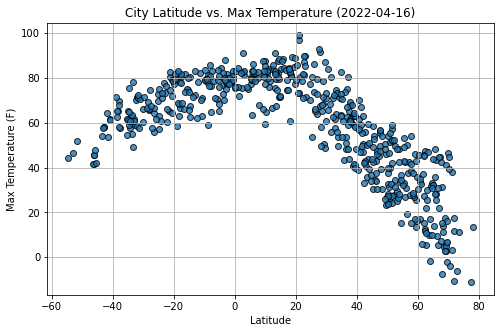

In [19]:
# clean_weather_df.plot(kind="scatter",x="Lat",y="Max Temp",grid=True,xlabel="Max Temperature (F)",
#                      ylabel="Latitude")

x_values = clean_weather_df['Lat']
y_values = clean_weather_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(8, 5))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(label=f"City Latitude vs. Max Temperature ({today_date})")
plt.grid()
plt.savefig("./output_data/latitude_vs_Max_Temperature.png", bbox_inches="tight")
plt.show()


## Latitude vs. Humidity Plot

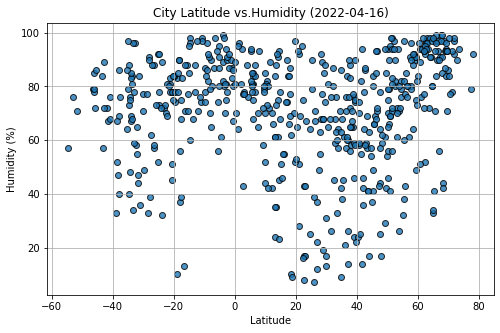

In [21]:
x_values = clean_weather_df['Lat']
y_values = clean_weather_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(8, 5))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(label=f"City Latitude vs.Humidity ({today_date})")
plt.grid()
plt.savefig("./output_data/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

## Latitude vs. Cloudiness Plot

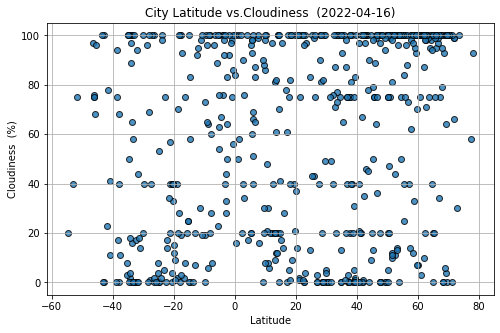

In [22]:
x_values = clean_weather_df['Lat']
y_values = clean_weather_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(8, 5))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness  (%)')
plt.title(label=f"City Latitude vs.Cloudiness  ({today_date})")
plt.grid()
plt.savefig("./output_data/latitude_vs_Cloudiness.png", bbox_inches="tight")
plt.show()

## Latitude vs. Wind Speed Plot

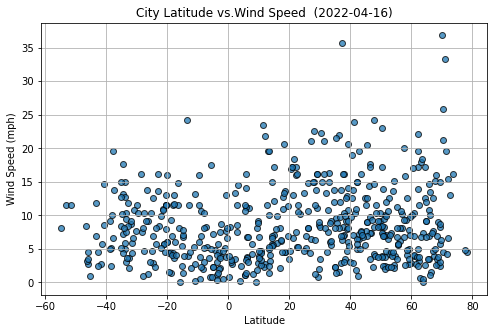

In [23]:
x_values = clean_weather_df['Lat']
y_values = clean_weather_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(8, 5))
plt.scatter(x_values, y_values,alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(label=f"City Latitude vs.Wind Speed  ({today_date})")
plt.grid()
plt.savefig("./output_data/latitude_vs_Wind_Speed.png", bbox_inches="tight")
plt.show()

## Linear Regression

In [24]:
n_hemisphere_weather_df = clean_weather_df.loc[weather_df["Lat"] >= 0]
s_hemisphere_weather_df = clean_weather_df.loc[weather_df["Lat"] < 0]
n_hemisphere_weather_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Jamestown,42.0970,-79.2353,50.52,42,0,14.97,US,1650142265
3,Tuktoyaktuk,69.4541,-133.0374,-2.20,71,0,5.75,CA,1650142266
5,Avera,33.1940,-82.5271,74.71,76,100,6.08,US,1650142267
6,Oyama,36.3000,139.8000,53.58,57,98,1.63,JP,1650142267
10,Barrow,71.2906,-156.7887,3.22,78,0,19.57,US,1650142203
...,...,...,...,...,...,...,...,...,...
556,Oak Harbor,48.2932,-122.6432,54.28,62,100,10.36,US,1650142472
558,Chu,43.5983,73.7614,59.34,41,45,7.58,KZ,1650142472
559,Suntar,62.1444,117.6319,15.49,93,87,4.92,RU,1650142473
560,Rumoi,43.9344,141.6428,39.51,63,90,7.09,JP,1650142473


In [25]:
s_hemisphere_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,41.49,85,75,2.77,NZ,1650142265
2,Avarua,-21.2078,-159.7750,80.65,83,20,5.75,CK,1650142009
4,Bengkulu,-3.8004,102.2655,76.89,89,100,3.00,ID,1650142266
7,Port Alfred,-33.5906,26.8910,61.18,84,100,3.00,ZA,1650142267
8,Hobart,-42.8794,147.3294,58.26,89,0,4.61,AU,1650142268
...,...,...,...,...,...,...,...,...,...
548,Uruguaiana,-29.7547,-57.0883,71.53,49,40,10.36,BR,1650142469
549,Vitória da Conquista,-14.8661,-40.8394,65.61,95,100,7.78,BR,1650142469
553,Neiafu,-18.6500,-173.9833,83.08,78,20,6.91,TO,1650142471
557,Tual,-5.6667,132.7500,83.62,74,100,4.94,ID,1650142324


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.764
The correlation between both factors is -0.87


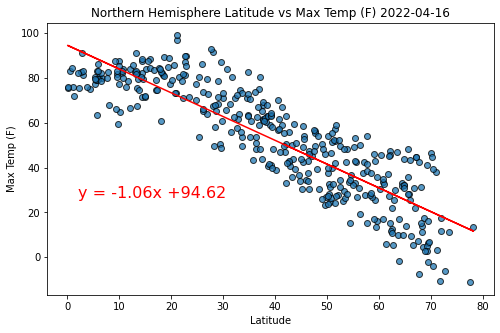

In [26]:
# Inputs
x_values = n_hemisphere_weather_df["Lat"]
y_values = n_hemisphere_weather_df["Max Temp"]
x_label="Latitude"
y_label="Max Temp (F)"

# Linear Regression Calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter Plot
fig1, ax1 = plt.subplots(figsize=(8,5))
plt.scatter(x_values, y_values,alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f"Northern Hemisphere {x_label} vs {y_label} {today_date}")

plt.annotate(line_eq,xy=(10, 50),xycoords='data',xytext=(0.4, 0.4),
             textcoords='axes fraction',horizontalalignment='right',
             verticalalignment='top',fontsize=16,color="red")

# Linear Regression plot
correlation = st.pearsonr(x_values,y_values)
print(f"The r-squared is: {round(rvalue**2,3)}")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(x_values,regress_values,"r-")

# Save plot 
plt.savefig("./output_data/N_Hemisphere_Max_Temp_vs_Lat_LR.png", bbox_inches="tight")
plt.show()

The $r^{2}$ = 0.764

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.574
The correlation between both factors is 0.76


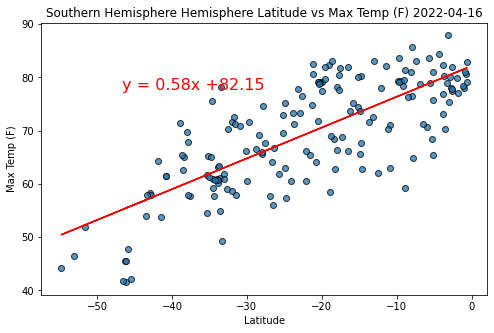

In [27]:
# Inputs
x_values = s_hemisphere_weather_df["Lat"]
y_values = s_hemisphere_weather_df["Max Temp"]
x_label="Latitude"
y_label="Max Temp (F)"

# Linear Regression Calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter Plot
fig1, ax1 = plt.subplots(figsize=(8,5))
plt.scatter(x_values, y_values,alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f"Southern Hemisphere Hemisphere {x_label} vs {y_label} {today_date}")

plt.annotate(line_eq,xy=(-5,40),xycoords='data',xytext=(0.5, 0.8),
             textcoords='axes fraction',horizontalalignment='right',
             verticalalignment='top',fontsize=16,color="red")

# Linear Regression plot
correlation = st.pearsonr(x_values,y_values)
print(f"The r-squared is: {round(rvalue**2,3)}")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(x_values,regress_values,"r-")

# Save plot 
plt.savefig("./output_data/S_Hemisphere_Max_Temp_vs_Lat_LR.png", bbox_inches="tight")
plt.show()

The $r^{2}$ = 0.574

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.052
The correlation between both factors is 0.23


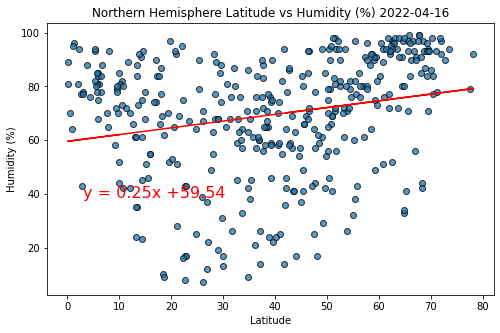

In [28]:
# Inputs
x_values = n_hemisphere_weather_df["Lat"]
y_values = n_hemisphere_weather_df["Humidity"]
x_label="Latitude"
y_label="Humidity (%)"

# Linear Regression Calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter Plot
fig1, ax1 = plt.subplots(figsize=(8,5))
plt.scatter(x_values, y_values,alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f"Northern Hemisphere {x_label} vs {y_label} {today_date}")

plt.annotate(line_eq,xy=(10, 50),xycoords='data',xytext=(0.4, 0.4),
             textcoords='axes fraction',horizontalalignment='right',
             verticalalignment='top',fontsize=16,color="red")

# Linear Regression plot
correlation = st.pearsonr(x_values,y_values)
print(f"The r-squared is: {round(rvalue**2,3)}")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(x_values,regress_values,"r-")

# Save plot 
plt.savefig("./output_data/N_Hemisphere_Humidity_vs_Lat_LR.png", bbox_inches="tight")
plt.show()

The $r^{2}$ =  0.052

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.088
The correlation between both factors is 0.3


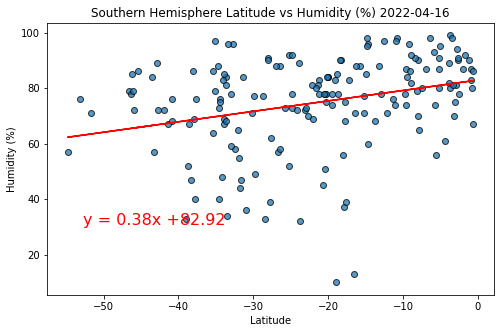

In [29]:
# Inputs
x_values = s_hemisphere_weather_df["Lat"]
y_values = s_hemisphere_weather_df["Humidity"]
x_label="Latitude"
y_label="Humidity (%)"

# Linear Regression Calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter Plot
fig1, ax1 = plt.subplots(figsize=(8,5))
plt.scatter(x_values, y_values,alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f"Southern Hemisphere {x_label} vs {y_label} {today_date}")

plt.annotate(line_eq,xy=(-5, 50),xycoords='data',xytext=(0.4, 0.3),
             textcoords='axes fraction',horizontalalignment='right',
             verticalalignment='top',fontsize=16,color="red")

# Linear Regression plot
correlation = st.pearsonr(x_values,y_values)
print(f"The r-squared is: {round(rvalue**2,3)}")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(x_values,regress_values,"r-")

# Save plot 
plt.savefig("./output_data/s_Hemisphere_Humidity_vs_Lat_LR.png", bbox_inches="tight")
plt.show()

The $r^{2}$ = 0.088

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.039
The correlation between both factors is 0.2


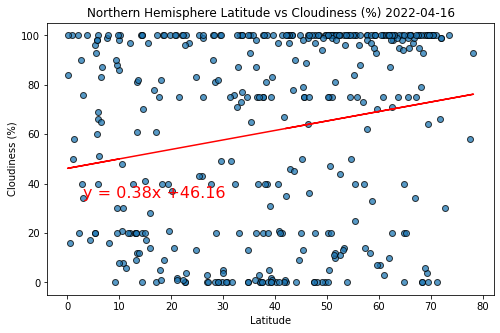

In [30]:
# Inputs
x_values = n_hemisphere_weather_df["Lat"]
y_values = n_hemisphere_weather_df["Cloudiness"]
x_label="Latitude"
y_label="Cloudiness (%)"

# Linear Regression Calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter Plot
fig1, ax1 = plt.subplots(figsize=(8,5))
plt.scatter(x_values, y_values,alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f"Northern Hemisphere {x_label} vs {y_label} {today_date}")

plt.annotate(line_eq,xy=(10, 50),xycoords='data',xytext=(0.4, 0.4),
             textcoords='axes fraction',horizontalalignment='right',
             verticalalignment='top',fontsize=16,color="red")

# Linear Regression plot
correlation = st.pearsonr(x_values,y_values)
print(f"The r-squared is: {round(rvalue**2,3)}")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(x_values,regress_values,"r-")

# Save plot 
plt.savefig("./output_data/N_Hemisphere_Cloudiness_vs_Lat_LR.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.033
The correlation between both factors is 0.18


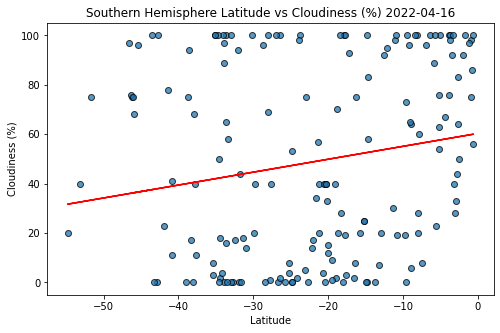

In [31]:
# Inputs
x_values = s_hemisphere_weather_df["Lat"]
y_values = s_hemisphere_weather_df["Cloudiness"]
x_label="Latitude"
y_label="Cloudiness (%)"

# Linear Regression Calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter Plot
fig1, ax1 = plt.subplots(figsize=(8,5))
plt.scatter(x_values, y_values,alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f"Southern Hemisphere {x_label} vs {y_label} {today_date}")

plt.annotate(line_eq,xy=(10, 50),xycoords='data',xytext=(0.4, 0.4),
             textcoords='axes fraction',horizontalalignment='right',
             verticalalignment='top',fontsize=16,color="red")

# Linear Regression plot
correlation = st.pearsonr(x_values,y_values)
print(f"The r-squared is: {round(rvalue**2,3)}")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(x_values,regress_values,"r-")

# Save plot 
plt.savefig("./output_data/S_Hemisphere_Cloudiness_vs_Lat_LR.png", bbox_inches="tight")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005
The correlation between both factors is 0.07


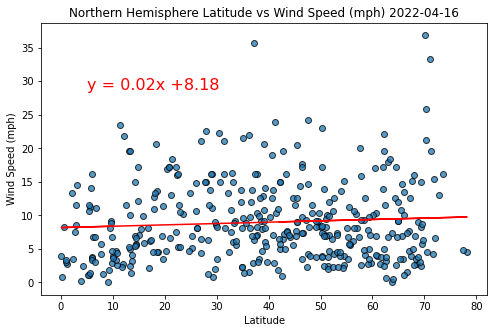

In [32]:
# Inputs
x_values = n_hemisphere_weather_df["Lat"]
y_values = n_hemisphere_weather_df["Wind Speed"]
x_label="Latitude"
y_label="Wind Speed (mph)"

# Linear Regression Calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter Plot
fig1, ax1 = plt.subplots(figsize=(8,5))
plt.scatter(x_values, y_values,alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f"Northern Hemisphere {x_label} vs {y_label} {today_date}")

plt.annotate(line_eq,xy=(10, 10),xycoords='data',xytext=(0.4, 0.8),
             textcoords='axes fraction',horizontalalignment='right',
             verticalalignment='top',fontsize=16,color="red")

# Linear Regression plot
correlation = st.pearsonr(x_values,y_values)
print(f"The r-squared is: {round(rvalue**2,3)}")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(x_values,regress_values,"r-")

# Save plot 
plt.savefig("./output_data/N_Hemisphere_Wind Speed_vs_Lat_LR.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.045
The correlation between both factors is -0.21


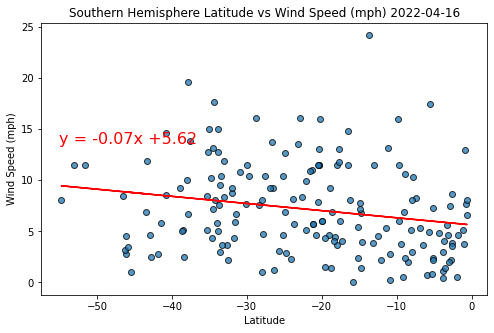

In [33]:
# Inputs
x_values = s_hemisphere_weather_df["Lat"]
y_values = s_hemisphere_weather_df["Wind Speed"]
x_label="Latitude"
y_label="Wind Speed (mph)"

# Linear Regression Calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter Plot
fig1, ax1 = plt.subplots(figsize=(8,5))
plt.scatter(x_values, y_values,alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f"Southern Hemisphere {x_label} vs {y_label} {today_date}")

plt.annotate(line_eq,xy=(-10, 10),xycoords='data',xytext=(0.35, 0.6),
             textcoords='axes fraction',horizontalalignment='right',
             verticalalignment='top',fontsize=16,color="red")

# Linear Regression plot
correlation = st.pearsonr(x_values,y_values)
print(f"The r-squared is: {round(rvalue**2,3)}")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(x_values,regress_values,"r-")

# Save plot 
plt.savefig("./output_data/S_Hemisphere_Wind Speed_vs_Lat_LR.png", bbox_inches="tight")
plt.show()